# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import cv2
import random
import numpy as np

# DONE: Fill this in based on where you saved the training and testing data

training_file = '../data/train.p'
validation_file='../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    


## DONE We want to add images of scaled pictures, and rotated pictures to have a more robust data set
def add_images_to_data_set(X_train, y_train):
    print("Original data set size: " + str(len(X_train)))
    ## For each image, either rotate or tranlate the picture
    X_train_new = []
    y_train_new = []
    
    for i in range(len(X_train)):
        image = X_train[i]
        label = y_train[i]
        
        is_new, result = transform_image(image)
        X_train_new.append(image)
        y_train_new.append(label)
        
        if is_new: 
            X_train_new.append(result)
            y_train_new.append(label)
            
        should_blur = random.randint(0, 3)
        if should_blur == 1:
            X_train_new.append(apply_blur(image))
            y_train_new.append(label)
 
    
    print("Final data set size: " + str(len(X_train_new)))
    return X_train_new, y_train_new
        
        
def transform_image(image): 
    
    operation_on_image = random.randint(0, 3) #0 = none, 1=translate 2=rotate 3=both
    image_modified = False
    rows, cols, layers = image.shape
    
    if operation_on_image == 0:
        dst = image
    elif operation_on_image == 1: 
        pixel_translation_x = random.randint(-5, 5)
        pixel_translation_y = random.randint(-5, 5)
        M = np.float32([[1,0,pixel_translation_x],[0,1,pixel_translation_y]])
        dst = cv2.warpAffine(image,M,(cols,rows))
        image_modified = True
    elif operation_on_image == 2: 
        angle = random.randint(-30, 30)
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
        dst = cv2.warpAffine(image,M,(cols,rows))
        image_modified = True
    elif operation_on_image == 3: 
        angle = random.randint(-30, 30)
        pixel_translation_x = random.randint(-5, 5)
        pixel_translation_y = random.randint(-5, 5)
        # angle 
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
        dst = cv2.warpAffine(image,M,(cols,rows))
        # translate
        M = np.float32([[1,0,pixel_translation_x],[0,1,pixel_translation_y]])
        dst = cv2.warpAffine(dst,M,(cols,rows))

    should_blur = random.randint(0, 3)
    if should_blur == 1:
        dst = apply_blur(dst)

        
    return image_modified, dst

def apply_blur(image):
        kernel_size = 3#2 * random.randint(1, 5) + 1 # Must be an odd number (3, 5, 7...)
        dst = cv2.GaussianBlur(image,(kernel_size, kernel_size),0)
        return dst
    
    
X_train, y_train = add_images_to_data_set(train['features'], train['labels'])
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Original data set size: 34799
Final data set size: 60857


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# DONE: Number of training examples
n_train = len(X_train)

# DONE: Number of validation examples
n_validation = len(X_valid)

# DONE: Number of testing examples.
n_test = len(X_test)

# DONE: What's the shape of an traffic sign image?
image_shape = X_test[0].shape

# DONE: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_valid))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 60857
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Random image examples


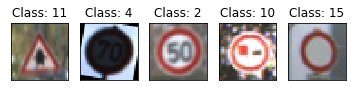

Count for each class: 
[  319.  3462.  3509.  2161.  3097.  2873.   640.  2254.  2195.  2326.
  3148.  2053.  3317.  3392.  1192.   929.   635.  1729.  1934.   309.
   511.   467.   592.   789.   422.  2379.   934.   371.   840.   424.
   683.  1190.   376.  1036.   635.  1856.   574.   313.  3258.   467.
   527.   370.   369.]



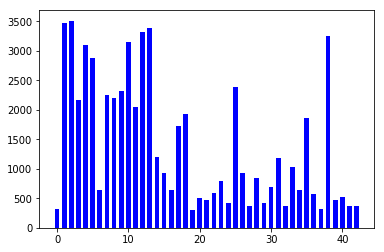

Example Images for class 35


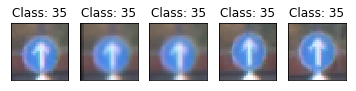

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_images(idx):
    f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5)
    ax0.imshow(X_train[idx[0]])
    ax0.set_title("Class: " + str(y_train[idx[0]]))
    ax0.axes.get_xaxis().set_visible(False)
    ax0.axes.get_yaxis().set_visible(False)
    ax1.imshow(X_train[idx[1]])
    ax1.set_title("Class: " + str(y_train[idx[1]]))
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    ax2.imshow(X_train[idx[2]])
    ax2.set_title("Class: " + str(y_train[idx[2]]))
    ax2.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)
    ax3.imshow(X_train[idx[3]])
    ax3.set_title("Class: " + str(y_train[idx[3]]))
    ax3.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)
    ax4.imshow(X_train[idx[4]])
    ax4.set_title("Class: " + str(y_train[idx[4]]))
    ax4.axes.get_xaxis().set_visible(False)
    ax4.axes.get_yaxis().set_visible(False)
    plt.show()
    

# Display 5 images and their class as the title
idx1 = []
idx1.append(random.randint(0, n_train))
idx1.append(random.randint(0, n_train))
idx1.append(random.randint(0, n_train))
idx1.append(random.randint(0, n_train))
idx1.append(random.randint(0, n_train))

print("Random image examples")
plot_images(idx1)

# Create an array with the count of each class. 
# The class id is the index of the array
class_count = np.zeros(n_classes)
for y in y_train:
    class_count[y] += 1
print("Count for each class: ")
print(class_count)
print()


N = len(class_count)
classes = range(N)
width = 1/1.5
plt.bar(classes, class_count, width, color="blue")
plt.show()

# Show different images for the class: j
j = 35
print("Example Images for class " + str(j))
idx2 = []
for i in range(len(y_train)):
    if(y_train[i] == j): 
        idx2.append(i)    
    if(len(idx2) == 5):
        break
plot_images(idx2)


    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

def normalize_image(image):
    normalized = (image - 128)/128
    return normalized


def gray_scaled(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray
 
def preprocess(X_train, y_train):
    X_preprocessed = []
    for i in range(len(X_train)):
        X_gray = gray_scaled(X_train[i])
        X_normalized = normalize_image(X_train[i])
        X_preprocessed.append(np.dstack((X_normalized, X_gray)))
        
    # Shuffle the data so the order doesn't have an impact on the result 
    X_train, y_train = shuffle(X_preprocessed, y_train)
    return X_train, y_train


### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

def LeNet(x, keep_prob = 1):
    mu = 0
    sigma = 0.1
    keep_prob = 0.5
    
    #Convolution 1. Input=32x32x4 - Output=28x28x8
    cv1_w = tf.Variable(tf.truncated_normal((5, 5, 4, 8), mean = mu, stddev = sigma))
    cv1_b = tf.Variable(tf.zeros(8))
    cv1 = tf.nn.conv2d(x, cv1_w, strides=[1, 1, 1, 1], padding = "VALID") + cv1_b
    
    #Activation
    cv1 = tf.nn.elu(cv1)
    
    # Mean pooling. Input=28x28x8 - Output=14x14x8
    cv1 = tf.nn.avg_pool(cv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = "VALID")
    
    #Convolution 2. Input=14x14x6 - Output=10x10x16
    conv2_w = tf.Variable(tf.truncated_normal((5, 5, 8, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(cv1, conv2_w, strides=[1, 1, 1, 1], padding = "VALID") + conv2_b
    
    #Activation 
    conv2 = tf.nn.elu(conv2)
    
    #Mean pooling. Input=10x10x16 - Output=5x5x16.
    conv2 = tf.nn.avg_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = "VALID")

    #Flatten Input=5x5x16 - Output=400
    fc0 = flatten(conv2)
    
    # Fully connected. Input=400 - Output=120
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma)) 
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b
    
    #Activation
    fc1 = tf.nn.elu(fc1)   
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    #Fully connected. Input=120 - Output=43
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_w) + fc2_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
EPOCHS = 25
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 4))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, (None))
one_hot_y = tf.one_hot(y, 43)

rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y:batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



Training
EPOCH 1 ...
Validation Accuracy = 0.024

EPOCH 1 ...
Validation Accuracy = 0.025

EPOCH 1 ...
Validation Accuracy = 0.036

EPOCH 1 ...
Validation Accuracy = 0.041

EPOCH 1 ...
Validation Accuracy = 0.036

EPOCH 1 ...
Validation Accuracy = 0.039

EPOCH 1 ...
Validation Accuracy = 0.048

EPOCH 1 ...
Validation Accuracy = 0.041

EPOCH 1 ...
Validation Accuracy = 0.037

EPOCH 1 ...
Validation Accuracy = 0.034

EPOCH 1 ...
Validation Accuracy = 0.038

EPOCH 1 ...
Validation Accuracy = 0.036

EPOCH 1 ...
Validation Accuracy = 0.039

EPOCH 1 ...
Validation Accuracy = 0.040

EPOCH 1 ...
Validation Accuracy = 0.033

EPOCH 1 ...
Validation Accuracy = 0.035

EPOCH 1 ...
Validation Accuracy = 0.033

EPOCH 1 ...
Validation Accuracy = 0.039

EPOCH 1 ...
Validation Accuracy = 0.035

EPOCH 1 ...
Validation Accuracy = 0.033

EPOCH 1 ...
Validation Accuracy = 0.036

EPOCH 1 ...
Validation Accuracy = 0.034

EPOCH 1 ...
Validation Accuracy = 0.038

EPOCH 1 ...
Validation Accuracy = 0.037

EPOCH 1

EPOCH 1 ...
Validation Accuracy = 0.382

EPOCH 1 ...
Validation Accuracy = 0.393

EPOCH 1 ...
Validation Accuracy = 0.393

EPOCH 1 ...
Validation Accuracy = 0.386

EPOCH 1 ...
Validation Accuracy = 0.391

EPOCH 1 ...
Validation Accuracy = 0.395

EPOCH 1 ...
Validation Accuracy = 0.401

EPOCH 1 ...
Validation Accuracy = 0.398

EPOCH 1 ...
Validation Accuracy = 0.395

EPOCH 1 ...
Validation Accuracy = 0.404

EPOCH 1 ...
Validation Accuracy = 0.399

EPOCH 1 ...
Validation Accuracy = 0.405

EPOCH 1 ...
Validation Accuracy = 0.406

EPOCH 1 ...
Validation Accuracy = 0.398

EPOCH 1 ...
Validation Accuracy = 0.406

EPOCH 1 ...
Validation Accuracy = 0.424

EPOCH 1 ...
Validation Accuracy = 0.416

EPOCH 1 ...
Validation Accuracy = 0.407

EPOCH 1 ...
Validation Accuracy = 0.416

EPOCH 1 ...
Validation Accuracy = 0.415

EPOCH 1 ...
Validation Accuracy = 0.419

EPOCH 1 ...
Validation Accuracy = 0.417

EPOCH 1 ...
Validation Accuracy = 0.412

EPOCH 1 ...
Validation Accuracy = 0.408

EPOCH 1 ...
Vali

EPOCH 1 ...
Validation Accuracy = 0.627

EPOCH 1 ...
Validation Accuracy = 0.634

EPOCH 1 ...
Validation Accuracy = 0.627

EPOCH 1 ...
Validation Accuracy = 0.632

EPOCH 1 ...
Validation Accuracy = 0.632

EPOCH 1 ...
Validation Accuracy = 0.633

EPOCH 1 ...
Validation Accuracy = 0.630

EPOCH 1 ...
Validation Accuracy = 0.634

EPOCH 1 ...
Validation Accuracy = 0.632

EPOCH 1 ...
Validation Accuracy = 0.637

EPOCH 1 ...
Validation Accuracy = 0.629

EPOCH 1 ...
Validation Accuracy = 0.636

EPOCH 1 ...
Validation Accuracy = 0.636

EPOCH 1 ...
Validation Accuracy = 0.629

EPOCH 1 ...
Validation Accuracy = 0.641

EPOCH 1 ...
Validation Accuracy = 0.642

EPOCH 1 ...
Validation Accuracy = 0.638

EPOCH 1 ...
Validation Accuracy = 0.639

EPOCH 1 ...
Validation Accuracy = 0.631

EPOCH 1 ...
Validation Accuracy = 0.639

EPOCH 1 ...
Validation Accuracy = 0.643

EPOCH 1 ...
Validation Accuracy = 0.644

EPOCH 1 ...
Validation Accuracy = 0.644

EPOCH 1 ...
Validation Accuracy = 0.644

EPOCH 1 ...
Vali

EPOCH 2 ...
Validation Accuracy = 0.721

EPOCH 2 ...
Validation Accuracy = 0.727

EPOCH 2 ...
Validation Accuracy = 0.725

EPOCH 2 ...
Validation Accuracy = 0.724

EPOCH 2 ...
Validation Accuracy = 0.730

EPOCH 2 ...
Validation Accuracy = 0.726

EPOCH 2 ...
Validation Accuracy = 0.738

EPOCH 2 ...
Validation Accuracy = 0.734

EPOCH 2 ...
Validation Accuracy = 0.731

EPOCH 2 ...
Validation Accuracy = 0.738

EPOCH 2 ...
Validation Accuracy = 0.725

EPOCH 2 ...
Validation Accuracy = 0.734

EPOCH 2 ...
Validation Accuracy = 0.742

EPOCH 2 ...
Validation Accuracy = 0.738

EPOCH 2 ...
Validation Accuracy = 0.737

EPOCH 2 ...
Validation Accuracy = 0.731

EPOCH 2 ...
Validation Accuracy = 0.735

EPOCH 2 ...
Validation Accuracy = 0.739

EPOCH 2 ...
Validation Accuracy = 0.740

EPOCH 2 ...
Validation Accuracy = 0.749

EPOCH 2 ...
Validation Accuracy = 0.738

EPOCH 2 ...
Validation Accuracy = 0.742

EPOCH 2 ...
Validation Accuracy = 0.729

EPOCH 2 ...
Validation Accuracy = 0.735

EPOCH 2 ...
Vali

EPOCH 2 ...
Validation Accuracy = 0.776

EPOCH 2 ...
Validation Accuracy = 0.784

EPOCH 2 ...
Validation Accuracy = 0.781

EPOCH 2 ...
Validation Accuracy = 0.790

EPOCH 2 ...
Validation Accuracy = 0.772

EPOCH 2 ...
Validation Accuracy = 0.777

EPOCH 2 ...
Validation Accuracy = 0.775

EPOCH 2 ...
Validation Accuracy = 0.779

EPOCH 2 ...
Validation Accuracy = 0.783

EPOCH 2 ...
Validation Accuracy = 0.789

EPOCH 2 ...
Validation Accuracy = 0.785

EPOCH 2 ...
Validation Accuracy = 0.791

EPOCH 2 ...
Validation Accuracy = 0.789

EPOCH 2 ...
Validation Accuracy = 0.789

EPOCH 2 ...
Validation Accuracy = 0.790

EPOCH 2 ...
Validation Accuracy = 0.787

EPOCH 2 ...
Validation Accuracy = 0.782

EPOCH 2 ...
Validation Accuracy = 0.776

EPOCH 2 ...
Validation Accuracy = 0.785

EPOCH 2 ...
Validation Accuracy = 0.787

EPOCH 2 ...
Validation Accuracy = 0.790

EPOCH 2 ...
Validation Accuracy = 0.784

EPOCH 2 ...
Validation Accuracy = 0.794

EPOCH 2 ...
Validation Accuracy = 0.779

EPOCH 2 ...
Vali

EPOCH 3 ...
Validation Accuracy = 0.812

EPOCH 3 ...
Validation Accuracy = 0.810

EPOCH 3 ...
Validation Accuracy = 0.815

EPOCH 3 ...
Validation Accuracy = 0.810

EPOCH 3 ...
Validation Accuracy = 0.813

EPOCH 3 ...
Validation Accuracy = 0.806

EPOCH 3 ...
Validation Accuracy = 0.815

EPOCH 3 ...
Validation Accuracy = 0.810

EPOCH 3 ...
Validation Accuracy = 0.812

EPOCH 3 ...
Validation Accuracy = 0.811

EPOCH 3 ...
Validation Accuracy = 0.815

EPOCH 3 ...
Validation Accuracy = 0.821

EPOCH 3 ...
Validation Accuracy = 0.814

EPOCH 3 ...
Validation Accuracy = 0.810

EPOCH 3 ...
Validation Accuracy = 0.818

EPOCH 3 ...
Validation Accuracy = 0.818

EPOCH 3 ...
Validation Accuracy = 0.821

EPOCH 3 ...
Validation Accuracy = 0.818

EPOCH 3 ...
Validation Accuracy = 0.815

EPOCH 3 ...
Validation Accuracy = 0.820

EPOCH 3 ...
Validation Accuracy = 0.827

EPOCH 3 ...
Validation Accuracy = 0.827

EPOCH 3 ...
Validation Accuracy = 0.822

EPOCH 3 ...
Validation Accuracy = 0.818

EPOCH 3 ...
Vali

EPOCH 3 ...
Validation Accuracy = 0.829

EPOCH 3 ...
Validation Accuracy = 0.831

EPOCH 3 ...
Validation Accuracy = 0.834

EPOCH 3 ...
Validation Accuracy = 0.841

EPOCH 3 ...
Validation Accuracy = 0.842

EPOCH 3 ...
Validation Accuracy = 0.834

EPOCH 3 ...
Validation Accuracy = 0.839

EPOCH 3 ...
Validation Accuracy = 0.838

EPOCH 3 ...
Validation Accuracy = 0.837

EPOCH 3 ...
Validation Accuracy = 0.842

EPOCH 3 ...
Validation Accuracy = 0.837

EPOCH 3 ...
Validation Accuracy = 0.837

EPOCH 3 ...
Validation Accuracy = 0.847

EPOCH 3 ...
Validation Accuracy = 0.846

EPOCH 3 ...
Validation Accuracy = 0.844

EPOCH 3 ...
Validation Accuracy = 0.850

EPOCH 3 ...
Validation Accuracy = 0.852

EPOCH 3 ...
Validation Accuracy = 0.849

EPOCH 3 ...
Validation Accuracy = 0.848

EPOCH 3 ...
Validation Accuracy = 0.840

EPOCH 3 ...
Validation Accuracy = 0.850

EPOCH 3 ...
Validation Accuracy = 0.841

EPOCH 3 ...
Validation Accuracy = 0.846

EPOCH 3 ...
Validation Accuracy = 0.847

EPOCH 3 ...
Vali

EPOCH 3 ...
Validation Accuracy = 0.850

EPOCH 3 ...
Validation Accuracy = 0.851

EPOCH 3 ...
Validation Accuracy = 0.859

EPOCH 3 ...
Validation Accuracy = 0.858

EPOCH 3 ...
Validation Accuracy = 0.859

EPOCH 3 ...
Validation Accuracy = 0.863

EPOCH 3 ...
Validation Accuracy = 0.847

EPOCH 3 ...
Validation Accuracy = 0.848

EPOCH 3 ...
Validation Accuracy = 0.847

EPOCH 3 ...
Validation Accuracy = 0.831

EPOCH 3 ...
Validation Accuracy = 0.847

EPOCH 3 ...
Validation Accuracy = 0.842

EPOCH 3 ...
Validation Accuracy = 0.857

EPOCH 3 ...
Validation Accuracy = 0.856

EPOCH 3 ...
Validation Accuracy = 0.857

EPOCH 3 ...
Validation Accuracy = 0.851

EPOCH 3 ...
Validation Accuracy = 0.849

EPOCH 3 ...
Validation Accuracy = 0.851

EPOCH 3 ...
Validation Accuracy = 0.850

EPOCH 3 ...
Validation Accuracy = 0.867

EPOCH 3 ...
Validation Accuracy = 0.855

EPOCH 3 ...
Validation Accuracy = 0.854

EPOCH 3 ...
Validation Accuracy = 0.862

EPOCH 3 ...
Validation Accuracy = 0.859

EPOCH 3 ...
Vali

EPOCH 4 ...
Validation Accuracy = 0.866

EPOCH 4 ...
Validation Accuracy = 0.870

EPOCH 4 ...
Validation Accuracy = 0.870

EPOCH 4 ...
Validation Accuracy = 0.868

EPOCH 4 ...
Validation Accuracy = 0.861

EPOCH 4 ...
Validation Accuracy = 0.856

EPOCH 4 ...
Validation Accuracy = 0.862

EPOCH 4 ...
Validation Accuracy = 0.857

EPOCH 4 ...
Validation Accuracy = 0.859

EPOCH 4 ...
Validation Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.866

EPOCH 4 ...
Validation Accuracy = 0.868

EPOCH 4 ...
Validation Accuracy = 0.859

EPOCH 4 ...
Validation Accuracy = 0.859

EPOCH 4 ...
Validation Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.867

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.863

EPOCH 4 ...
Validation Accuracy = 0.866

EPOCH 4 ...
Validation Accuracy = 0.871

EPOCH 4 ...
Validation Accuracy = 0.866

EPOCH 4 ...
Validation Accuracy = 0.873

EPOCH 4 ...
Validation Accuracy = 0.867

EPOCH 4 ...
Vali

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.873

EPOCH 4 ...
Validation Accuracy = 0.872

EPOCH 4 ...
Validation Accuracy = 0.868

EPOCH 4 ...
Validation Accuracy = 0.874

EPOCH 4 ...
Validation Accuracy = 0.869

EPOCH 4 ...
Validation Accuracy = 0.860

EPOCH 4 ...
Validation Accuracy = 0.873

EPOCH 4 ...
Validation Accuracy = 0.878

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.871

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.878

EPOCH 4 ...
Validation Accuracy = 0.882

EPOCH 4 ...
Validation Accuracy = 0.875

EPOCH 4 ...
Validation Accuracy = 0.882

EPOCH 4 ...
Validation Accuracy = 0.872

EPOCH 4 ...
Validation Accuracy = 0.875

EPOCH 4 ...
Validation Accuracy = 0.874

EPOCH 4 ...
Validation Accuracy = 0.878

EPOCH 4 ...
Validation Accuracy = 0.876

EPOCH 4 ...
Validation Accuracy = 0.871

EPOCH 4 ...
Validation Accuracy = 0.872

EPOCH 4 ...
Vali

EPOCH 5 ...
Validation Accuracy = 0.887

EPOCH 5 ...
Validation Accuracy = 0.886

EPOCH 5 ...
Validation Accuracy = 0.880

EPOCH 5 ...
Validation Accuracy = 0.874

EPOCH 5 ...
Validation Accuracy = 0.869

EPOCH 5 ...
Validation Accuracy = 0.873

EPOCH 5 ...
Validation Accuracy = 0.872

EPOCH 5 ...
Validation Accuracy = 0.869

EPOCH 5 ...
Validation Accuracy = 0.874

EPOCH 5 ...
Validation Accuracy = 0.878

EPOCH 5 ...
Validation Accuracy = 0.876

EPOCH 5 ...
Validation Accuracy = 0.877

EPOCH 5 ...
Validation Accuracy = 0.880

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 5 ...
Validation Accuracy = 0.891

EPOCH 5 ...
Validation Accuracy = 0.885

EPOCH 5 ...
Validation Accuracy = 0.890

EPOCH 5 ...
Validation Accuracy = 0.888

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 5 ...
Validation Accuracy = 0.887

EPOCH 5 ...
Validation Accuracy = 0.885

EPOCH 5 ...
Vali

EPOCH 5 ...
Validation Accuracy = 0.893

EPOCH 5 ...
Validation Accuracy = 0.891

EPOCH 5 ...
Validation Accuracy = 0.900

EPOCH 5 ...
Validation Accuracy = 0.891

EPOCH 5 ...
Validation Accuracy = 0.887

EPOCH 5 ...
Validation Accuracy = 0.889

EPOCH 5 ...
Validation Accuracy = 0.886

EPOCH 5 ...
Validation Accuracy = 0.887

EPOCH 5 ...
Validation Accuracy = 0.887

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 5 ...
Validation Accuracy = 0.882

EPOCH 5 ...
Validation Accuracy = 0.878

EPOCH 5 ...
Validation Accuracy = 0.873

EPOCH 5 ...
Validation Accuracy = 0.879

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 5 ...
Validation Accuracy = 0.881

EPOCH 5 ...
Validation Accuracy = 0.876

EPOCH 5 ...
Validation Accuracy = 0.882

EPOCH 5 ...
Validation Accuracy = 0.884

EPOCH 5 ...
Validation Accuracy = 0.883

EPOCH 5 ...
Validation Accuracy = 0.890

EPOCH 5 ...
Validation Accuracy = 0.878

EPOCH 5 ...
Validation Accuracy = 0.882

EPOCH 5 ...
Validation Accuracy = 0.881

EPOCH 5 ...
Vali

EPOCH 6 ...
Validation Accuracy = 0.886

EPOCH 6 ...
Validation Accuracy = 0.893

EPOCH 6 ...
Validation Accuracy = 0.889

EPOCH 6 ...
Validation Accuracy = 0.891

EPOCH 6 ...
Validation Accuracy = 0.893

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.893

EPOCH 6 ...
Validation Accuracy = 0.893

EPOCH 6 ...
Validation Accuracy = 0.905

EPOCH 6 ...
Validation Accuracy = 0.889

EPOCH 6 ...
Validation Accuracy = 0.896

EPOCH 6 ...
Validation Accuracy = 0.882

EPOCH 6 ...
Validation Accuracy = 0.888

EPOCH 6 ...
Validation Accuracy = 0.884

EPOCH 6 ...
Validation Accuracy = 0.882

EPOCH 6 ...
Validation Accuracy = 0.888

EPOCH 6 ...
Validation Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.889

EPOCH 6 ...
Validation Accuracy = 0.885

EPOCH 6 ...
Validation Accuracy = 0.883

EPOCH 6 ...
Validation Accuracy = 0.883

EPOCH 6 ...
Validation Accuracy = 0.889

EPOCH 6 ...
Validation Accuracy = 0.886

EPOCH 6 ...
Validation Accuracy = 0.890

EPOCH 6 ...
Vali

EPOCH 6 ...
Validation Accuracy = 0.887

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.894

EPOCH 6 ...
Validation Accuracy = 0.888

EPOCH 6 ...
Validation Accuracy = 0.893

EPOCH 6 ...
Validation Accuracy = 0.887

EPOCH 6 ...
Validation Accuracy = 0.889

EPOCH 6 ...
Validation Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.890

EPOCH 6 ...
Validation Accuracy = 0.889

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.894

EPOCH 6 ...
Validation Accuracy = 0.900

EPOCH 6 ...
Validation Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.893

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.898

EPOCH 6 ...
Validation Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.897

EPOCH 6 ...
Validation Accuracy = 0.898

EPOCH 6 ...
Validation Accuracy = 0.903

EPOCH 6 ...
Vali

EPOCH 6 ...
Validation Accuracy = 0.897

EPOCH 6 ...
Validation Accuracy = 0.893

EPOCH 6 ...
Validation Accuracy = 0.898

EPOCH 6 ...
Validation Accuracy = 0.899

EPOCH 6 ...
Validation Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.898

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.901

EPOCH 6 ...
Validation Accuracy = 0.900

EPOCH 6 ...
Validation Accuracy = 0.904

EPOCH 6 ...
Validation Accuracy = 0.898

EPOCH 6 ...
Validation Accuracy = 0.898

EPOCH 6 ...
Validation Accuracy = 0.904

EPOCH 6 ...
Validation Accuracy = 0.892

EPOCH 6 ...
Validation Accuracy = 0.898

EPOCH 6 ...
Validation Accuracy = 0.900

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 6 ...
Validation Accuracy = 0.896

EPOCH 6 ...
Validation Accuracy = 0.900

EPOCH 6 ...
Validation Accuracy = 0.906

EPOCH 6 ...
Validation Accuracy = 0.900

EPOCH 6 ...
Validation Accuracy = 0.902

EPOCH 6 ...
Validation Accuracy = 0.899

EPOCH 6 ...
Vali

EPOCH 7 ...
Validation Accuracy = 0.887

EPOCH 7 ...
Validation Accuracy = 0.893

EPOCH 7 ...
Validation Accuracy = 0.896

EPOCH 7 ...
Validation Accuracy = 0.892

EPOCH 7 ...
Validation Accuracy = 0.904

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.900

EPOCH 7 ...
Validation Accuracy = 0.904

EPOCH 7 ...
Validation Accuracy = 0.898

EPOCH 7 ...
Validation Accuracy = 0.899

EPOCH 7 ...
Validation Accuracy = 0.896

EPOCH 7 ...
Validation Accuracy = 0.904

EPOCH 7 ...
Validation Accuracy = 0.901

EPOCH 7 ...
Validation Accuracy = 0.903

EPOCH 7 ...
Validation Accuracy = 0.905

EPOCH 7 ...
Validation Accuracy = 0.900

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.898

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.898

EPOCH 7 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.900

EPOCH 7 ...
Vali

EPOCH 7 ...
Validation Accuracy = 0.907

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.900

EPOCH 7 ...
Validation Accuracy = 0.900

EPOCH 7 ...
Validation Accuracy = 0.904

EPOCH 7 ...
Validation Accuracy = 0.900

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.908

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.903

EPOCH 7 ...
Validation Accuracy = 0.898

EPOCH 7 ...
Validation Accuracy = 0.907

EPOCH 7 ...
Validation Accuracy = 0.904

EPOCH 7 ...
Validation Accuracy = 0.914

EPOCH 7 ...
Validation Accuracy = 0.902

EPOCH 7 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.908

EPOCH 7 ...
Validation Accuracy = 0.913

EPOCH 7 ...
Validation Accuracy = 0.905

EPOCH 7 ...
Validation Accuracy = 0.910

EPOCH 7 ...
Validation Accuracy = 0.898

EPOCH 7 ...
Validation Accuracy = 0.909

EPOCH 7 ...
Validation Accuracy = 0.905

EPOCH 7 ...
Vali

EPOCH 8 ...
Validation Accuracy = 0.905

EPOCH 8 ...
Validation Accuracy = 0.901

EPOCH 8 ...
Validation Accuracy = 0.905

EPOCH 8 ...
Validation Accuracy = 0.907

EPOCH 8 ...
Validation Accuracy = 0.902

EPOCH 8 ...
Validation Accuracy = 0.903

EPOCH 8 ...
Validation Accuracy = 0.898

EPOCH 8 ...
Validation Accuracy = 0.898

EPOCH 8 ...
Validation Accuracy = 0.902

EPOCH 8 ...
Validation Accuracy = 0.894

EPOCH 8 ...
Validation Accuracy = 0.892

EPOCH 8 ...
Validation Accuracy = 0.892

EPOCH 8 ...
Validation Accuracy = 0.892

EPOCH 8 ...
Validation Accuracy = 0.893

EPOCH 8 ...
Validation Accuracy = 0.904

EPOCH 8 ...
Validation Accuracy = 0.901

EPOCH 8 ...
Validation Accuracy = 0.896

EPOCH 8 ...
Validation Accuracy = 0.894

EPOCH 8 ...
Validation Accuracy = 0.890

EPOCH 8 ...
Validation Accuracy = 0.902

EPOCH 8 ...
Validation Accuracy = 0.896

EPOCH 8 ...
Validation Accuracy = 0.904

EPOCH 8 ...
Validation Accuracy = 0.909

EPOCH 8 ...
Validation Accuracy = 0.907

EPOCH 8 ...
Vali

EPOCH 8 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.901

EPOCH 8 ...
Validation Accuracy = 0.902

EPOCH 8 ...
Validation Accuracy = 0.908

EPOCH 8 ...
Validation Accuracy = 0.900

EPOCH 8 ...
Validation Accuracy = 0.904

EPOCH 8 ...
Validation Accuracy = 0.908

EPOCH 8 ...
Validation Accuracy = 0.904

EPOCH 8 ...
Validation Accuracy = 0.909

EPOCH 8 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.912

EPOCH 8 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.910

EPOCH 8 ...
Validation Accuracy = 0.916

EPOCH 8 ...
Validation Accuracy = 0.912

EPOCH 8 ...
Validation Accuracy = 0.906

EPOCH 8 ...
Validation Accuracy = 0.912

EPOCH 8 ...
Validation Accuracy = 0.906

EPOCH 8 ...
Validation Accuracy = 0.907

EPOCH 8 ...
Validation Accuracy = 0.906

EPOCH 8 ...
Validation Accuracy = 0.905

EPOCH 8 ...
Validation Accuracy = 0.909

EPOCH 8 ...
Validation Accuracy = 0.902

EPOCH 8 ...
Vali

EPOCH 8 ...
Validation Accuracy = 0.903

EPOCH 8 ...
Validation Accuracy = 0.905

EPOCH 8 ...
Validation Accuracy = 0.902

EPOCH 8 ...
Validation Accuracy = 0.907

EPOCH 8 ...
Validation Accuracy = 0.909

EPOCH 8 ...
Validation Accuracy = 0.914

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.911

EPOCH 9 ...
Validation Accuracy = 0.911

EPOCH 9 ...
Validation Accuracy = 0.912

EPOCH 9 ...
Validation Accuracy = 0.911

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 9 ...
Validation Accuracy = 0.913

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.914

EPOCH 9 ...
Validation Accuracy = 0.912

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.915

EPOCH 9 ...
Validation Accuracy = 0.915

EPOCH 9 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Vali

EPOCH 9 ...
Validation Accuracy = 0.921

EPOCH 9 ...
Validation Accuracy = 0.924

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.906

EPOCH 9 ...
Validation Accuracy = 0.906

EPOCH 9 ...
Validation Accuracy = 0.912

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.918

EPOCH 9 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.924

EPOCH 9 ...
Validation Accuracy = 0.923

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.914

EPOCH 9 ...
Validation Accuracy = 0.913

EPOCH 9 ...
Validation Accuracy = 0.921

EPOCH 9 ...
Validation Accuracy = 0.924

EPOCH 9 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.921

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.913

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Vali

EPOCH 9 ...
Validation Accuracy = 0.911

EPOCH 9 ...
Validation Accuracy = 0.906

EPOCH 9 ...
Validation Accuracy = 0.903

EPOCH 9 ...
Validation Accuracy = 0.899

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.906

EPOCH 9 ...
Validation Accuracy = 0.907

EPOCH 9 ...
Validation Accuracy = 0.905

EPOCH 9 ...
Validation Accuracy = 0.902

EPOCH 9 ...
Validation Accuracy = 0.907

EPOCH 9 ...
Validation Accuracy = 0.913

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 9 ...
Validation Accuracy = 0.912

EPOCH 9 ...
Validation Accuracy = 0.911

EPOCH 9 ...
Validation Accuracy = 0.913

EPOCH 9 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.918

EPOCH 9 ...
Validation Accuracy = 0.915

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Validation Accuracy = 0.920

EPOCH 9 ...
Validation Accuracy = 0.916

EPOCH 9 ...
Validation Accuracy = 0.915

EPOCH 9 ...
Validation Accuracy = 0.920

EPOCH 9 ...
Validation Accuracy = 0.917

EPOCH 9 ...
Vali

EPOCH 10 ...
Validation Accuracy = 0.922

EPOCH 10 ...
Validation Accuracy = 0.914

EPOCH 10 ...
Validation Accuracy = 0.917

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.920

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.924

EPOCH 10 ...
Validation Accuracy = 0.924

EPOCH 10 ...
Validation Accuracy = 0.920

EPOCH 10 ...
Validation Accuracy = 0.918

EPOCH 10 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.913

EPOCH 10 ...
Validation Accuracy = 0.909

EPOCH 10 ...
Validation Accuracy = 0.905

EPOCH 10 ...
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Accuracy = 0.907

EPOCH 10 ...
Validation Accuracy = 0.906

EPOCH 10 ...
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Accuracy = 0.911

EPOCH 10 ...
Validation Accuracy = 0.909

EPOCH 10 ...
Validation Accuracy = 0.903

EPOCH 10 ...
Validation Accuracy =

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.917

EPOCH 10 ...
Validation Accuracy = 0.917

EPOCH 10 ...
Validation Accuracy = 0.921

EPOCH 10 ...
Validation Accuracy = 0.921

EPOCH 10 ...
Validation Accuracy = 0.920

EPOCH 10 ...
Validation Accuracy = 0.925

EPOCH 10 ...
Validation Accuracy = 0.921

EPOCH 10 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.921

EPOCH 10 ...
Validation Accuracy = 0.923

EPOCH 10 ...
Validation Accuracy = 0.922

EPOCH 10 ...
Validation Accuracy = 0.923

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy = 0.922

EPOCH 10 ...
Validation Accuracy = 0.923

EPOCH 10 ...
Validation Accuracy = 0.922

EPOCH 10 ...
Validation Accuracy = 0.924

EPOCH 10 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.918

EPOCH 10 ...
Validation Accuracy = 0.918

EPOCH 10 ...
Validation Accuracy = 0.915

EPOCH 10 ...
Validation Accuracy =

EPOCH 11 ...
Validation Accuracy = 0.913

EPOCH 11 ...
Validation Accuracy = 0.923

EPOCH 11 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy = 0.911

EPOCH 11 ...
Validation Accuracy = 0.912

EPOCH 11 ...
Validation Accuracy = 0.909

EPOCH 11 ...
Validation Accuracy = 0.911

EPOCH 11 ...
Validation Accuracy = 0.920

EPOCH 11 ...
Validation Accuracy = 0.919

EPOCH 11 ...
Validation Accuracy = 0.916

EPOCH 11 ...
Validation Accuracy = 0.914

EPOCH 11 ...
Validation Accuracy = 0.916

EPOCH 11 ...
Validation Accuracy = 0.926

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 11 ...
Validation Accuracy = 0.919

EPOCH 11 ...
Validation Accuracy = 0.920

EPOCH 11 ...
Validation Accuracy = 0.913

EPOCH 11 ...
Validation Accuracy = 0.914

EPOCH 11 ...
Validation Accuracy = 0.912

EPOCH 11 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.921

EPOCH 11 ...
Validation Accuracy =

EPOCH 11 ...
Validation Accuracy = 0.922

EPOCH 11 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy = 0.913

EPOCH 11 ...
Validation Accuracy = 0.916

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 11 ...
Validation Accuracy = 0.921

EPOCH 11 ...
Validation Accuracy = 0.920

EPOCH 11 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.916

EPOCH 11 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.921

EPOCH 11 ...
Validation Accuracy = 0.922

EPOCH 11 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy = 0.918

EPOCH 11 ...
Validation Accuracy = 0.918

EPOCH 11 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.926

EPOCH 11 ...
Validation Accuracy = 0.922

EPOCH 11 ...
Validation Accuracy = 0.920

EPOCH 11 ...
Validation Accuracy = 0.919

EPOCH 11 ...
Validation Accuracy = 0.928

EPOCH 11 ...
Validation Accuracy =

EPOCH 11 ...
Validation Accuracy = 0.915

EPOCH 11 ...
Validation Accuracy = 0.921

EPOCH 11 ...
Validation Accuracy = 0.919

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 11 ...
Validation Accuracy = 0.923

EPOCH 11 ...
Validation Accuracy = 0.922

EPOCH 11 ...
Validation Accuracy = 0.923

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 11 ...
Validation Accuracy = 0.926

EPOCH 11 ...
Validation Accuracy = 0.926

EPOCH 11 ...
Validation Accuracy = 0.928

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 11 ...
Validation Accuracy = 0.930

EPOCH 11 ...
Validation Accuracy = 0.921

EPOCH 11 ...
Validation Accuracy = 0.923

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 11 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy = 0.916

EPOCH 11 ...
Validation Accuracy = 0.908

EPOCH 11 ...
Validation Accuracy = 0.912

EPOCH 11 ...
Validation Accuracy = 0.916

EPOCH 11 ...
Validation Accuracy = 0.917

EPOCH 11 ...
Validation Accuracy =

EPOCH 12 ...
Validation Accuracy = 0.929

EPOCH 12 ...
Validation Accuracy = 0.925

EPOCH 12 ...
Validation Accuracy = 0.919

EPOCH 12 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.922

EPOCH 12 ...
Validation Accuracy = 0.922

EPOCH 12 ...
Validation Accuracy = 0.928

EPOCH 12 ...
Validation Accuracy = 0.928

EPOCH 12 ...
Validation Accuracy = 0.921

EPOCH 12 ...
Validation Accuracy = 0.923

EPOCH 12 ...
Validation Accuracy = 0.925

EPOCH 12 ...
Validation Accuracy = 0.919

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 12 ...
Validation Accuracy = 0.928

EPOCH 12 ...
Validation Accuracy = 0.926

EPOCH 12 ...
Validation Accuracy = 0.923

EPOCH 12 ...
Validation Accuracy = 0.915

EPOCH 12 ...
Validation Accuracy = 0.910

EPOCH 12 ...
Validation Accuracy = 0.912

EPOCH 12 ...
Validation Accuracy = 0.919

EPOCH 12 ...
Validation Accuracy = 0.918

EPOCH 12 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy =

EPOCH 12 ...
Validation Accuracy = 0.926

EPOCH 12 ...
Validation Accuracy = 0.925

EPOCH 12 ...
Validation Accuracy = 0.918

EPOCH 12 ...
Validation Accuracy = 0.922

EPOCH 12 ...
Validation Accuracy = 0.920

EPOCH 12 ...
Validation Accuracy = 0.920

EPOCH 12 ...
Validation Accuracy = 0.925

EPOCH 12 ...
Validation Accuracy = 0.920

EPOCH 12 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.926

EPOCH 12 ...
Validation Accuracy = 0.922

EPOCH 12 ...
Validation Accuracy = 0.918

EPOCH 12 ...
Validation Accuracy = 0.915

EPOCH 12 ...
Validation Accuracy = 0.921

EPOCH 12 ...
Validation Accuracy = 0.916

EPOCH 12 ...
Validation Accuracy = 0.919

EPOCH 12 ...
Validation Accuracy = 0.918

EPOCH 12 ...
Validation Accuracy = 0.925

EPOCH 12 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.925

EPOCH 12 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.921

EPOCH 12 ...
Validation Accuracy =

EPOCH 13 ...
Validation Accuracy = 0.912

EPOCH 13 ...
Validation Accuracy = 0.915

EPOCH 13 ...
Validation Accuracy = 0.917

EPOCH 13 ...
Validation Accuracy = 0.921

EPOCH 13 ...
Validation Accuracy = 0.922

EPOCH 13 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.923

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.935

EPOCH 13 ...
Validation Accuracy = 0.920

EPOCH 13 ...
Validation Accuracy = 0.924

EPOCH 13 ...
Validation Accuracy = 0.913

EPOCH 13 ...
Validation Accuracy = 0.914

EPOCH 13 ...
Validation Accuracy = 0.915

EPOCH 13 ...
Validation Accuracy = 0.915

EPOCH 13 ...
Validation Accuracy = 0.919

EPOCH 13 ...
Validation Accuracy = 0.920

EPOCH 13 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.923

EPOCH 13 ...
Validation Accuracy = 0.919

EPOCH 13 ...
Validation Accuracy =

EPOCH 13 ...
Validation Accuracy = 0.918

EPOCH 13 ...
Validation Accuracy = 0.922

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.929

EPOCH 13 ...
Validation Accuracy = 0.928

EPOCH 13 ...
Validation Accuracy = 0.925

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.924

EPOCH 13 ...
Validation Accuracy = 0.917

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.924

EPOCH 13 ...
Validation Accuracy = 0.922

EPOCH 13 ...
Validation Accuracy = 0.929

EPOCH 13 ...
Validation Accuracy = 0.924

EPOCH 13 ...
Validation Accuracy = 0.928

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.932

EPOCH 13 ...
Validation Accuracy = 0.930

EPOCH 13 ...
Validation Accuracy = 0.930

EPOCH 13 ...
Validation Accuracy = 0.932

EPOCH 13 ...
Validation Accuracy = 0.933

EPOCH 13 ...
Validation Accuracy = 0.933

EPOCH 13 ...
Validation Accuracy =

EPOCH 13 ...
Validation Accuracy = 0.922

EPOCH 13 ...
Validation Accuracy = 0.918

EPOCH 13 ...
Validation Accuracy = 0.920

EPOCH 13 ...
Validation Accuracy = 0.915

EPOCH 13 ...
Validation Accuracy = 0.921

EPOCH 13 ...
Validation Accuracy = 0.913

EPOCH 13 ...
Validation Accuracy = 0.920

EPOCH 13 ...
Validation Accuracy = 0.925

EPOCH 13 ...
Validation Accuracy = 0.925

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.925

EPOCH 13 ...
Validation Accuracy = 0.926

EPOCH 13 ...
Validation Accuracy = 0.922

EPOCH 13 ...
Validation Accuracy = 0.921

EPOCH 13 ...
Validation Accuracy = 0.922

EPOCH 13 ...
Validation Accuracy = 0.915

EPOCH 13 ...
Validation Accuracy = 0.920

EPOCH 13 ...
Validation Accuracy = 0.923

EPOCH 13 ...
Validation Accuracy = 0.925

EPOCH 13 ...
Validation Accuracy = 0.921

EPOCH 13 ...
Validation Accuracy = 0.925

EPOCH 13 ...
Validation Accuracy = 0.924

EPOCH 13 ...
Validation Accuracy = 0.920

EPOCH 13 ...
Validation Accuracy =

EPOCH 14 ...
Validation Accuracy = 0.915

EPOCH 14 ...
Validation Accuracy = 0.913

EPOCH 14 ...
Validation Accuracy = 0.916

EPOCH 14 ...
Validation Accuracy = 0.920

EPOCH 14 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.919

EPOCH 14 ...
Validation Accuracy = 0.923

EPOCH 14 ...
Validation Accuracy = 0.924

EPOCH 14 ...
Validation Accuracy = 0.923

EPOCH 14 ...
Validation Accuracy = 0.919

EPOCH 14 ...
Validation Accuracy = 0.919

EPOCH 14 ...
Validation Accuracy = 0.921

EPOCH 14 ...
Validation Accuracy = 0.917

EPOCH 14 ...
Validation Accuracy = 0.918

EPOCH 14 ...
Validation Accuracy = 0.915

EPOCH 14 ...
Validation Accuracy = 0.927

EPOCH 14 ...
Validation Accuracy = 0.920

EPOCH 14 ...
Validation Accuracy = 0.922

EPOCH 14 ...
Validation Accuracy = 0.925

EPOCH 14 ...
Validation Accuracy = 0.928

EPOCH 14 ...
Validation Accuracy = 0.926

EPOCH 14 ...
Validation Accuracy = 0.925

EPOCH 14 ...
Validation Accuracy = 0.922

EPOCH 14 ...
Validation Accuracy =

EPOCH 14 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.932

EPOCH 14 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.922

EPOCH 14 ...
Validation Accuracy = 0.924

EPOCH 14 ...
Validation Accuracy = 0.923

EPOCH 14 ...
Validation Accuracy = 0.927

EPOCH 14 ...
Validation Accuracy = 0.920

EPOCH 14 ...
Validation Accuracy = 0.925

EPOCH 14 ...
Validation Accuracy = 0.929

EPOCH 14 ...
Validation Accuracy = 0.926

EPOCH 14 ...
Validation Accuracy = 0.925

EPOCH 14 ...
Validation Accuracy = 0.923

EPOCH 14 ...
Validation Accuracy = 0.924

EPOCH 14 ...
Validation Accuracy = 0.917

EPOCH 14 ...
Validation Accuracy = 0.926

EPOCH 14 ...
Validation Accuracy = 0.928

EPOCH 14 ...
Validation Accuracy = 0.925

EPOCH 14 ...
Validation Accuracy = 0.924

EPOCH 14 ...
Validation Accuracy = 0.927

EPOCH 14 ...
Validation Accuracy = 0.925

EPOCH 14 ...
Validation Accuracy = 0.919

EPOCH 14 ...
Validation Accuracy = 0.916

EPOCH 14 ...
Validation Accuracy =

EPOCH 15 ...
Validation Accuracy = 0.920

EPOCH 15 ...
Validation Accuracy = 0.924

EPOCH 15 ...
Validation Accuracy = 0.929

EPOCH 15 ...
Validation Accuracy = 0.929

EPOCH 15 ...
Validation Accuracy = 0.926

EPOCH 15 ...
Validation Accuracy = 0.933

EPOCH 15 ...
Validation Accuracy = 0.923

EPOCH 15 ...
Validation Accuracy = 0.923

EPOCH 15 ...
Validation Accuracy = 0.924

EPOCH 15 ...
Validation Accuracy = 0.922

EPOCH 15 ...
Validation Accuracy = 0.930

EPOCH 15 ...
Validation Accuracy = 0.926

EPOCH 15 ...
Validation Accuracy = 0.931

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.928

EPOCH 15 ...
Validation Accuracy = 0.931

EPOCH 15 ...
Validation Accuracy = 0.927

EPOCH 15 ...
Validation Accuracy = 0.928

EPOCH 15 ...
Validation Accuracy = 0.927

EPOCH 15 ...
Validation Accuracy = 0.928

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.931

EPOCH 15 ...
Validation Accuracy = 0.923

EPOCH 15 ...
Validation Accuracy =

EPOCH 15 ...
Validation Accuracy = 0.922

EPOCH 15 ...
Validation Accuracy = 0.922

EPOCH 15 ...
Validation Accuracy = 0.914

EPOCH 15 ...
Validation Accuracy = 0.922

EPOCH 15 ...
Validation Accuracy = 0.921

EPOCH 15 ...
Validation Accuracy = 0.923

EPOCH 15 ...
Validation Accuracy = 0.920

EPOCH 15 ...
Validation Accuracy = 0.930

EPOCH 15 ...
Validation Accuracy = 0.933

EPOCH 15 ...
Validation Accuracy = 0.928

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.930

EPOCH 15 ...
Validation Accuracy = 0.929

EPOCH 15 ...
Validation Accuracy = 0.925

EPOCH 15 ...
Validation Accuracy = 0.925

EPOCH 15 ...
Validation Accuracy = 0.932

EPOCH 15 ...
Validation Accuracy = 0.926

EPOCH 15 ...
Validation Accuracy = 0.927

EPOCH 15 ...
Validation Accuracy = 0.929

EPOCH 15 ...
Validation Accuracy = 0.924

EPOCH 15 ...
Validation Accuracy = 0.923

EPOCH 15 ...
Validation Accuracy = 0.925

EPOCH 15 ...
Validation Accuracy =

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 16 ...
Validation Accuracy = 0.924

EPOCH 16 ...
Validation Accuracy = 0.921

EPOCH 16 ...
Validation Accuracy = 0.921

EPOCH 16 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 16 ...
Validation Accuracy = 0.924

EPOCH 16 ...
Validation Accuracy = 0.922

EPOCH 16 ...
Validation Accuracy = 0.927

EPOCH 16 ...
Validation Accuracy = 0.927

EPOCH 16 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.928

EPOCH 16 ...
Validation Accuracy = 0.935

EPOCH 16 ...
Validation Accuracy = 0.931

EPOCH 16 ...
Validation Accuracy = 0.934

EPOCH 16 ...
Validation Accuracy = 0.931

EPOCH 16 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.931

EPOCH 16 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.935

EPOCH 16 ...
Validation Accuracy = 0.934

EPOCH 16 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy =

EPOCH 16 ...
Validation Accuracy = 0.918

EPOCH 16 ...
Validation Accuracy = 0.920

EPOCH 16 ...
Validation Accuracy = 0.915

EPOCH 16 ...
Validation Accuracy = 0.917

EPOCH 16 ...
Validation Accuracy = 0.916

EPOCH 16 ...
Validation Accuracy = 0.923

EPOCH 16 ...
Validation Accuracy = 0.923

EPOCH 16 ...
Validation Accuracy = 0.934

EPOCH 16 ...
Validation Accuracy = 0.926

EPOCH 16 ...
Validation Accuracy = 0.924

EPOCH 16 ...
Validation Accuracy = 0.927

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 16 ...
Validation Accuracy = 0.923

EPOCH 16 ...
Validation Accuracy = 0.924

EPOCH 16 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.929

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 16 ...
Validation Accuracy = 0.931

EPOCH 16 ...
Validation Accuracy = 0.927

EPOCH 16 ...
Validation Accuracy = 0.927

EPOCH 16 ...
Validation Accuracy = 0.927

EPOCH 16 ...
Validation Accuracy = 0.931

EPOCH 16 ...
Validation Accuracy = 0.929

EPOCH 16 ...
Validation Accuracy =

EPOCH 16 ...
Validation Accuracy = 0.935

EPOCH 16 ...
Validation Accuracy = 0.934

EPOCH 16 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.929

EPOCH 16 ...
Validation Accuracy = 0.930

EPOCH 16 ...
Validation Accuracy = 0.933

EPOCH 16 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.926

EPOCH 16 ...
Validation Accuracy = 0.924

EPOCH 16 ...
Validation Accuracy = 0.910

EPOCH 16 ...
Validation Accuracy = 0.916

EPOCH 16 ...
Validation Accuracy = 0.912

EPOCH 16 ...
Validation Accuracy = 0.913

EPOCH 16 ...
Validation Accuracy = 0.920

EPOCH 16 ...
Validation Accuracy = 0.923

EPOCH 16 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.932

EPOCH 16 ...
Validation Accuracy = 0.926

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 16 ...
Validation Accuracy = 0.929

EPOCH 16 ...
Validation Accuracy = 0.925

EPOCH 16 ...
Validation Accuracy = 0.931

EPOCH 16 ...
Validation Accuracy = 0.928

EPOCH 16 ...
Validation Accuracy =

EPOCH 17 ...
Validation Accuracy = 0.937

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 17 ...
Validation Accuracy = 0.933

EPOCH 17 ...
Validation Accuracy = 0.933

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 17 ...
Validation Accuracy = 0.931

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 17 ...
Validation Accuracy = 0.921

EPOCH 17 ...
Validation Accuracy = 0.923

EPOCH 17 ...
Validation Accuracy = 0.927

EPOCH 17 ...
Validation Accuracy = 0.926

EPOCH 17 ...
Validation Accuracy = 0.926

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 17 ...
Validation Accuracy = 0.925

EPOCH 17 ...
Validation Accuracy = 0.928

EPOCH 17 ...
Validation Accuracy = 0.928

EPOCH 17 ...
Validation Accuracy = 0.928

EPOCH 17 ...
Validation Accuracy = 0.932

EPOCH 17 ...
Validation Accuracy = 0.933

EPOCH 17 ...
Validation Accuracy = 0.934

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 17 ...
Validation Accuracy = 0.930

EPOCH 17 ...
Validation Accuracy =

EPOCH 17 ...
Validation Accuracy = 0.928

EPOCH 17 ...
Validation Accuracy = 0.928

EPOCH 17 ...
Validation Accuracy = 0.927

EPOCH 17 ...
Validation Accuracy = 0.926

EPOCH 17 ...
Validation Accuracy = 0.927

EPOCH 17 ...
Validation Accuracy = 0.932

EPOCH 17 ...
Validation Accuracy = 0.927

EPOCH 17 ...
Validation Accuracy = 0.928

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 17 ...
Validation Accuracy = 0.937

EPOCH 17 ...
Validation Accuracy = 0.938

EPOCH 17 ...
Validation Accuracy = 0.933

EPOCH 17 ...
Validation Accuracy = 0.941

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 17 ...
Validation Accuracy = 0.931

EPOCH 17 ...
Validation Accuracy = 0.936

EPOCH 17 ...
Validation Accuracy = 0.929

EPOCH 17 ...
Validation Accuracy = 0.934

EPOCH 17 ...
Validation Accuracy = 0.936

EPOCH 17 ...
Validation Accuracy = 0.932

EPOCH 17 ...
Validation Accuracy = 0.932

EPOCH 17 ...
Validation Accuracy = 0.925

EPOCH 17 ...
Validation Accuracy = 0.920

EPOCH 17 ...
Validation Accuracy =

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.922

EPOCH 18 ...
Validation Accuracy = 0.913

EPOCH 18 ...
Validation Accuracy = 0.907

EPOCH 18 ...
Validation Accuracy = 0.904

EPOCH 18 ...
Validation Accuracy = 0.905

EPOCH 18 ...
Validation Accuracy = 0.909

EPOCH 18 ...
Validation Accuracy = 0.921

EPOCH 18 ...
Validation Accuracy = 0.924

EPOCH 18 ...
Validation Accuracy = 0.924

EPOCH 18 ...
Validation Accuracy = 0.926

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.935

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.925

EPOCH 18 ...
Validation Accuracy = 0.927

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 18 ...
Validation Accuracy = 0.925

EPOCH 18 ...
Validation Accuracy = 0.920

EPOCH 18 ...
Validation Accuracy =

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.926

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.924

EPOCH 18 ...
Validation Accuracy = 0.922

EPOCH 18 ...
Validation Accuracy = 0.920

EPOCH 18 ...
Validation Accuracy = 0.921

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.925

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.926

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.933

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.935

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 18 ...
Validation Accuracy =

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.923

EPOCH 18 ...
Validation Accuracy = 0.927

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy = 0.935

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.927

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.930

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.927

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.925

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.931

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.933

EPOCH 18 ...
Validation Accuracy = 0.929

EPOCH 18 ...
Validation Accuracy = 0.928

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 18 ...
Validation Accuracy =

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 19 ...
Validation Accuracy = 0.942

EPOCH 19 ...
Validation Accuracy = 0.940

EPOCH 19 ...
Validation Accuracy = 0.937

EPOCH 19 ...
Validation Accuracy = 0.939

EPOCH 19 ...
Validation Accuracy = 0.937

EPOCH 19 ...
Validation Accuracy = 0.933

EPOCH 19 ...
Validation Accuracy = 0.940

EPOCH 19 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.935

EPOCH 19 ...
Validation Accuracy = 0.937

EPOCH 19 ...
Validation Accuracy = 0.933

EPOCH 19 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.936

EPOCH 19 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.930

EPOCH 19 ...
Validation Accuracy = 0.929

EPOCH 19 ...
Validation Accuracy = 0.930

EPOCH 19 ...
Validation Accuracy = 0.934

EPOCH 19 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.928

EPOCH 19 ...
Validation Accuracy = 0.934

EPOCH 19 ...
Validation Accuracy =

EPOCH 19 ...
Validation Accuracy = 0.929

EPOCH 19 ...
Validation Accuracy = 0.925

EPOCH 19 ...
Validation Accuracy = 0.930

EPOCH 19 ...
Validation Accuracy = 0.924

EPOCH 19 ...
Validation Accuracy = 0.927

EPOCH 19 ...
Validation Accuracy = 0.924

EPOCH 19 ...
Validation Accuracy = 0.931

EPOCH 19 ...
Validation Accuracy = 0.934

EPOCH 19 ...
Validation Accuracy = 0.935

EPOCH 19 ...
Validation Accuracy = 0.936

EPOCH 19 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.936

EPOCH 19 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.931

EPOCH 19 ...
Validation Accuracy = 0.929

EPOCH 19 ...
Validation Accuracy = 0.930

EPOCH 19 ...
Validation Accuracy = 0.928

EPOCH 19 ...
Validation Accuracy = 0.924

EPOCH 19 ...
Validation Accuracy = 0.918

EPOCH 19 ...
Validation Accuracy = 0.919

EPOCH 19 ...
Validation Accuracy = 0.919

EPOCH 19 ...
Validation Accuracy = 0.927

EPOCH 19 ...
Validation Accuracy =

EPOCH 20 ...
Validation Accuracy = 0.935

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.933

EPOCH 20 ...
Validation Accuracy = 0.929

EPOCH 20 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.933

EPOCH 20 ...
Validation Accuracy = 0.940

EPOCH 20 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.941

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 20 ...
Validation Accuracy = 0.945

EPOCH 20 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.941

EPOCH 20 ...
Validation Accuracy = 0.941

EPOCH 20 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.932

EPOCH 20 ...
Validation Accuracy = 0.930

EPOCH 20 ...
Validation Accuracy = 0.936

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy =

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.941

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.935

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.929

EPOCH 20 ...
Validation Accuracy = 0.933

EPOCH 20 ...
Validation Accuracy = 0.930

EPOCH 20 ...
Validation Accuracy = 0.925

EPOCH 20 ...
Validation Accuracy = 0.928

EPOCH 20 ...
Validation Accuracy = 0.924

EPOCH 20 ...
Validation Accuracy = 0.924

EPOCH 20 ...
Validation Accuracy = 0.924

EPOCH 20 ...
Validation Accuracy = 0.921

EPOCH 20 ...
Validation Accuracy = 0.923

EPOCH 20 ...
Validation Accuracy = 0.927

EPOCH 20 ...
Validation Accuracy = 0.926

EPOCH 20 ...
Validation Accuracy = 0.928

EPOCH 20 ...
Validation Accuracy =

EPOCH 20 ...
Validation Accuracy = 0.926

EPOCH 20 ...
Validation Accuracy = 0.925

EPOCH 20 ...
Validation Accuracy = 0.927

EPOCH 20 ...
Validation Accuracy = 0.928

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.931

EPOCH 20 ...
Validation Accuracy = 0.932

EPOCH 20 ...
Validation Accuracy = 0.932

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 20 ...
Validation Accuracy = 0.937

EPOCH 20 ...
Validation Accuracy = 0.935

EPOCH 20 ...
Validation Accuracy = 0.938

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 20 ...
Validation Accuracy = 0.929

EPOCH 20 ...
Validation Accuracy = 0.923

EPOCH 20 ...
Validation Accuracy = 0.912

EPOCH 20 ...
Validation Accuracy = 0.923

EPOCH 20 ...
Validation Accuracy = 0.923

EPOCH 20 ...
Validation Accuracy = 0.924

EPOCH 20 ...
Validation Accuracy = 0.930

EPOCH 20 ...
Validation Accuracy = 0.930

EPOCH 20 ...
Validation Accuracy = 0.936

EPOCH 20 ...
Validation Accuracy =

EPOCH 21 ...
Validation Accuracy = 0.930

EPOCH 21 ...
Validation Accuracy = 0.929

EPOCH 21 ...
Validation Accuracy = 0.927

EPOCH 21 ...
Validation Accuracy = 0.929

EPOCH 21 ...
Validation Accuracy = 0.928

EPOCH 21 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.933

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 21 ...
Validation Accuracy = 0.933

EPOCH 21 ...
Validation Accuracy = 0.936

EPOCH 21 ...
Validation Accuracy = 0.933

EPOCH 21 ...
Validation Accuracy = 0.931

EPOCH 21 ...
Validation Accuracy = 0.935

EPOCH 21 ...
Validation Accuracy = 0.940

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 21 ...
Validation Accuracy = 0.935

EPOCH 21 ...
Validation Accuracy = 0.940

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 21 ...
Validation Accuracy = 0.937

EPOCH 21 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.937

EPOCH 21 ...
Validation Accuracy = 0.939

EPOCH 21 ...
Validation Accuracy =

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 21 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.927

EPOCH 21 ...
Validation Accuracy = 0.928

EPOCH 21 ...
Validation Accuracy = 0.927

EPOCH 21 ...
Validation Accuracy = 0.923

EPOCH 21 ...
Validation Accuracy = 0.928

EPOCH 21 ...
Validation Accuracy = 0.927

EPOCH 21 ...
Validation Accuracy = 0.929

EPOCH 21 ...
Validation Accuracy = 0.930

EPOCH 21 ...
Validation Accuracy = 0.929

EPOCH 21 ...
Validation Accuracy = 0.928

EPOCH 21 ...
Validation Accuracy = 0.931

EPOCH 21 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.931

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 21 ...
Validation Accuracy = 0.936

EPOCH 21 ...
Validation Accuracy = 0.932

EPOCH 21 ...
Validation Accuracy = 0.936

EPOCH 21 ...
Validation Accuracy = 0.933

EPOCH 21 ...
Validation Accuracy = 0.936

EPOCH 21 ...
Validation Accuracy = 0.940

EPOCH 21 ...
Validation Accuracy = 0.940

EPOCH 21 ...
Validation Accuracy =

EPOCH 22 ...
Validation Accuracy = 0.924

EPOCH 22 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.931

EPOCH 22 ...
Validation Accuracy = 0.930

EPOCH 22 ...
Validation Accuracy = 0.927

EPOCH 22 ...
Validation Accuracy = 0.931

EPOCH 22 ...
Validation Accuracy = 0.926

EPOCH 22 ...
Validation Accuracy = 0.927

EPOCH 22 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.926

EPOCH 22 ...
Validation Accuracy = 0.924

EPOCH 22 ...
Validation Accuracy = 0.923

EPOCH 22 ...
Validation Accuracy = 0.915

EPOCH 22 ...
Validation Accuracy = 0.921

EPOCH 22 ...
Validation Accuracy = 0.921

EPOCH 22 ...
Validation Accuracy = 0.928

EPOCH 22 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.928

EPOCH 22 ...
Validation Accuracy = 0.926

EPOCH 22 ...
Validation Accuracy = 0.931

EPOCH 22 ...
Validation Accuracy = 0.932

EPOCH 22 ...
Validation Accuracy = 0.926

EPOCH 22 ...
Validation Accuracy = 0.920

EPOCH 22 ...
Validation Accuracy =

EPOCH 22 ...
Validation Accuracy = 0.939

EPOCH 22 ...
Validation Accuracy = 0.934

EPOCH 22 ...
Validation Accuracy = 0.935

EPOCH 22 ...
Validation Accuracy = 0.937

EPOCH 22 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.931

EPOCH 22 ...
Validation Accuracy = 0.928

EPOCH 22 ...
Validation Accuracy = 0.938

EPOCH 22 ...
Validation Accuracy = 0.939

EPOCH 22 ...
Validation Accuracy = 0.940

EPOCH 22 ...
Validation Accuracy = 0.937

EPOCH 22 ...
Validation Accuracy = 0.935

EPOCH 22 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.929

EPOCH 22 ...
Validation Accuracy = 0.938

EPOCH 22 ...
Validation Accuracy = 0.937

EPOCH 22 ...
Validation Accuracy = 0.936

EPOCH 22 ...
Validation Accuracy = 0.935

EPOCH 22 ...
Validation Accuracy = 0.944

EPOCH 22 ...
Validation Accuracy = 0.938

EPOCH 22 ...
Validation Accuracy = 0.941

EPOCH 22 ...
Validation Accuracy =

EPOCH 23 ...
Validation Accuracy = 0.922

EPOCH 23 ...
Validation Accuracy = 0.922

EPOCH 23 ...
Validation Accuracy = 0.923

EPOCH 23 ...
Validation Accuracy = 0.922

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy = 0.926

EPOCH 23 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.928

EPOCH 23 ...
Validation Accuracy = 0.926

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy = 0.925

EPOCH 23 ...
Validation Accuracy = 0.929

EPOCH 23 ...
Validation Accuracy = 0.924

EPOCH 23 ...
Validation Accuracy = 0.932

EPOCH 23 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.931

EPOCH 23 ...
Validation Accuracy = 0.925

EPOCH 23 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy = 0.924

EPOCH 23 ...
Validation Accuracy = 0.928

EPOCH 23 ...
Validation Accuracy = 0.931

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy =

EPOCH 23 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.942

EPOCH 23 ...
Validation Accuracy = 0.935

EPOCH 23 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy = 0.926

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy = 0.929

EPOCH 23 ...
Validation Accuracy = 0.926

EPOCH 23 ...
Validation Accuracy = 0.929

EPOCH 23 ...
Validation Accuracy = 0.925

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy = 0.931

EPOCH 23 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.932

EPOCH 23 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.939

EPOCH 23 ...
Validation Accuracy = 0.935

EPOCH 23 ...
Validation Accuracy = 0.938

EPOCH 23 ...
Validation Accuracy = 0.938

EPOCH 23 ...
Validation Accuracy = 0.942

EPOCH 23 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy =

EPOCH 23 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.938

EPOCH 23 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.938

EPOCH 23 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy = 0.936

EPOCH 23 ...
Validation Accuracy = 0.930

EPOCH 23 ...
Validation Accuracy = 0.934

EPOCH 23 ...
Validation Accuracy = 0.939

EPOCH 23 ...
Validation Accuracy = 0.935

EPOCH 23 ...
Validation Accuracy = 0.935

EPOCH 23 ...
Validation Accuracy = 0.930

EPOCH 23 ...
Validation Accuracy = 0.931

EPOCH 23 ...
Validation Accuracy = 0.929

EPOCH 23 ...
Validation Accuracy = 0.928

EPOCH 23 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.931

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy = 0.936

EPOCH 23 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0.936

EPOCH 23 ...
Validation Accuracy = 0.938

EPOCH 23 ...
Validation Accuracy = 0.937

EPOCH 23 ...
Validation Accuracy =

EPOCH 24 ...
Validation Accuracy = 0.939

EPOCH 24 ...
Validation Accuracy = 0.941

EPOCH 24 ...
Validation Accuracy = 0.939

EPOCH 24 ...
Validation Accuracy = 0.942

EPOCH 24 ...
Validation Accuracy = 0.940

EPOCH 24 ...
Validation Accuracy = 0.935

EPOCH 24 ...
Validation Accuracy = 0.939

EPOCH 24 ...
Validation Accuracy = 0.934

EPOCH 24 ...
Validation Accuracy = 0.937

EPOCH 24 ...
Validation Accuracy = 0.933

EPOCH 24 ...
Validation Accuracy = 0.934

EPOCH 24 ...
Validation Accuracy = 0.929

EPOCH 24 ...
Validation Accuracy = 0.930

EPOCH 24 ...
Validation Accuracy = 0.927

EPOCH 24 ...
Validation Accuracy = 0.934

EPOCH 24 ...
Validation Accuracy = 0.937

EPOCH 24 ...
Validation Accuracy = 0.934

EPOCH 24 ...
Validation Accuracy = 0.932

EPOCH 24 ...
Validation Accuracy = 0.935

EPOCH 24 ...
Validation Accuracy = 0.936

EPOCH 24 ...
Validation Accuracy = 0.944

EPOCH 24 ...
Validation Accuracy = 0.945

EPOCH 24 ...
Validation Accuracy = 0.943

EPOCH 24 ...
Validation Accuracy =

EPOCH 24 ...
Validation Accuracy = 0.926

EPOCH 24 ...
Validation Accuracy = 0.925

EPOCH 24 ...
Validation Accuracy = 0.921

EPOCH 24 ...
Validation Accuracy = 0.920

EPOCH 24 ...
Validation Accuracy = 0.920

EPOCH 24 ...
Validation Accuracy = 0.922

EPOCH 24 ...
Validation Accuracy = 0.920

EPOCH 24 ...
Validation Accuracy = 0.920

EPOCH 24 ...
Validation Accuracy = 0.931

EPOCH 24 ...
Validation Accuracy = 0.926

EPOCH 24 ...
Validation Accuracy = 0.929

EPOCH 24 ...
Validation Accuracy = 0.930

EPOCH 24 ...
Validation Accuracy = 0.924

EPOCH 24 ...
Validation Accuracy = 0.934

EPOCH 24 ...
Validation Accuracy = 0.935

EPOCH 24 ...
Validation Accuracy = 0.934

EPOCH 24 ...
Validation Accuracy = 0.933

EPOCH 24 ...
Validation Accuracy = 0.933

EPOCH 24 ...
Validation Accuracy = 0.930

EPOCH 24 ...
Validation Accuracy = 0.939

EPOCH 24 ...
Validation Accuracy = 0.935

EPOCH 24 ...
Validation Accuracy = 0.934

EPOCH 24 ...
Validation Accuracy = 0.938

EPOCH 24 ...
Validation Accuracy =

EPOCH 25 ...
Validation Accuracy = 0.943

EPOCH 25 ...
Validation Accuracy = 0.943

EPOCH 25 ...
Validation Accuracy = 0.946

EPOCH 25 ...
Validation Accuracy = 0.946

EPOCH 25 ...
Validation Accuracy = 0.944

EPOCH 25 ...
Validation Accuracy = 0.937

EPOCH 25 ...
Validation Accuracy = 0.938

EPOCH 25 ...
Validation Accuracy = 0.933

EPOCH 25 ...
Validation Accuracy = 0.934

EPOCH 25 ...
Validation Accuracy = 0.935

EPOCH 25 ...
Validation Accuracy = 0.936

EPOCH 25 ...
Validation Accuracy = 0.929

EPOCH 25 ...
Validation Accuracy = 0.932

EPOCH 25 ...
Validation Accuracy = 0.931

EPOCH 25 ...
Validation Accuracy = 0.932

EPOCH 25 ...
Validation Accuracy = 0.937

EPOCH 25 ...
Validation Accuracy = 0.934

EPOCH 25 ...
Validation Accuracy = 0.935

EPOCH 25 ...
Validation Accuracy = 0.931

EPOCH 25 ...
Validation Accuracy = 0.931

EPOCH 25 ...
Validation Accuracy = 0.935

EPOCH 25 ...
Validation Accuracy = 0.935

EPOCH 25 ...
Validation Accuracy = 0.939

EPOCH 25 ...
Validation Accuracy =

EPOCH 25 ...
Validation Accuracy = 0.941

EPOCH 25 ...
Validation Accuracy = 0.938

EPOCH 25 ...
Validation Accuracy = 0.941

EPOCH 25 ...
Validation Accuracy = 0.939

EPOCH 25 ...
Validation Accuracy = 0.940

EPOCH 25 ...
Validation Accuracy = 0.934

EPOCH 25 ...
Validation Accuracy = 0.931

EPOCH 25 ...
Validation Accuracy = 0.928

EPOCH 25 ...
Validation Accuracy = 0.926

EPOCH 25 ...
Validation Accuracy = 0.926

EPOCH 25 ...
Validation Accuracy = 0.927

EPOCH 25 ...
Validation Accuracy = 0.936

EPOCH 25 ...
Validation Accuracy = 0.933

EPOCH 25 ...
Validation Accuracy = 0.937

EPOCH 25 ...
Validation Accuracy = 0.933

EPOCH 25 ...
Validation Accuracy = 0.938

EPOCH 25 ...
Validation Accuracy = 0.941

EPOCH 25 ...
Validation Accuracy = 0.940

EPOCH 25 ...
Validation Accuracy = 0.941

EPOCH 25 ...
Validation Accuracy = 0.940

EPOCH 25 ...
Validation Accuracy = 0.939

EPOCH 25 ...
Validation Accuracy = 0.943

EPOCH 25 ...
Validation Accuracy = 0.939

EPOCH 25 ...
Validation Accuracy =

EPOCH 25 ...
Validation Accuracy = 0.940

EPOCH 25 ...
Validation Accuracy = 0.939

EPOCH 25 ...
Validation Accuracy = 0.940

EPOCH 25 ...
Validation Accuracy = 0.938

EPOCH 25 ...
Validation Accuracy = 0.939

EPOCH 25 ...
Validation Accuracy = 0.939

EPOCH 25 ...
Validation Accuracy = 0.943

EPOCH 25 ...
Validation Accuracy = 0.946

EPOCH 25 ...
Validation Accuracy = 0.944

EPOCH 25 ...
Validation Accuracy = 0.941

EPOCH 25 ...
Validation Accuracy = 0.942

EPOCH 25 ...
Validation Accuracy = 0.938

EPOCH 25 ...
Validation Accuracy = 0.941

EPOCH 25 ...
Validation Accuracy = 0.941

EPOCH 25 ...
Validation Accuracy = 0.942

EPOCH 25 ...
Validation Accuracy = 0.942

EPOCH 25 ...
Validation Accuracy = 0.938

EPOCH 25 ...
Validation Accuracy = 0.939

EPOCH 25 ...
Validation Accuracy = 0.941

EPOCH 25 ...
Validation Accuracy = 0.939

EPOCH 25 ...
Validation Accuracy = 0.940

EPOCH 25 ...
Validation Accuracy = 0.936

EPOCH 25 ...
Validation Accuracy = 0.934

EPOCH 25 ...
Validation Accuracy =

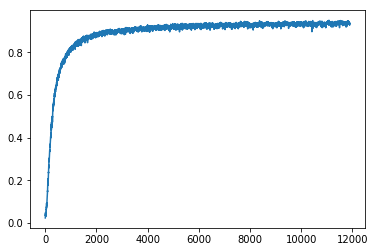

In [7]:
X_train, y_train = preprocess(X_train, y_train)
X_valid, y_valid = preprocess(X_valid, y_valid)

accuracy = []

saver = tf.train.Saver()

with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training")
    
    for i in range (EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
            validation_accuracy = evaluate(X_valid, y_valid)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            accuracy.append(validation_accuracy)
            print()
    saver.save(sess, './lenet')
    print("Model saved")
            
plt.plot(accuracy)
plt.show()

accuracy: 0.931972788872


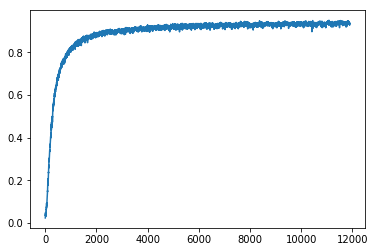

Tensor("Equal:0", dtype=bool)


In [8]:
print("accuracy: " + str(accuracy[-1]))
plt.plot(accuracy)
plt.show()

print(correct_prediction)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

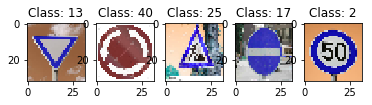

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

X_test_signs = []
y_test_signs = []


X_test_signs.append(cv2.resize(cv2.imread('test_images/yield.jpg'), (32, 32)))
y_test_signs.append(13)
X_test_signs.append(cv2.resize(cv2.imread('test_images/roundabout.jpg'), (32, 32)))
y_test_signs.append(40)
X_test_signs.append(cv2.resize(cv2.imread('test_images/caution.jpg'), (32, 32)))
y_test_signs.append(25)
X_test_signs.append(cv2.resize(cv2.imread('test_images/do_not_enter.jpg'), (32, 32)))
y_test_signs.append(17)
X_test_signs.append(cv2.resize(cv2.imread('test_images/speedlimit50.jpg'), (32, 32)))
y_test_signs.append(2)

f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5)
ax0.imshow(X_test_signs[0])
ax0.set_title("Class: " + str(y_test_signs[0]))
ax1.imshow(X_test_signs[1])
ax1.set_title("Class: " + str(y_test_signs[1]))
ax2.imshow(X_test_signs[2])
ax2.set_title("Class: " + str(y_test_signs[2]))
ax3.imshow(X_test_signs[3])
ax3.set_title("Class: " + str(y_test_signs[3]))
ax4.imshow(X_test_signs[4])
ax4.set_title("Class: " + str(y_test_signs[4]))
plt.show()

X_test_signs, y_test_signs = preprocess(X_test_signs, y_test_signs)


### Predict the Sign Type for Each Image

In [10]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    classes = sess.run(tf.argmax(logits, 1), feed_dict={x: X_test_signs})
    one_hot_encoded = sess.run(tf.argmax(one_hot_y, 1), feed_dict={y: y_test_signs})
    
    for i in range(0, 5):
        print("Class for image " + str(i) + " is: " + str(classes[i]))
        print("One hot encoded for image " + str(i) + " is: " + str(one_hot_encoded[i]))


INFO:tensorflow:Restoring parameters from ./lenet
Class for image 0 is: 25
One hot encoded for image 0 is: 25
Class for image 1 is: 17
One hot encoded for image 1 is: 17
Class for image 2 is: 2
One hot encoded for image 2 is: 2
Class for image 3 is: 13
One hot encoded for image 3 is: 13
Class for image 4 is: 35
One hot encoded for image 4 is: 40


### Analyze Performance

In [11]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

accuracy = 0 
for i in range(0, 5): 
    if (classes[i] == one_hot_encoded[i]):
        accuracy += 1
accuracy = accuracy / 5

print('Test Accuracy: {}'.format(accuracy))

Test Accuracy: 0.8


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


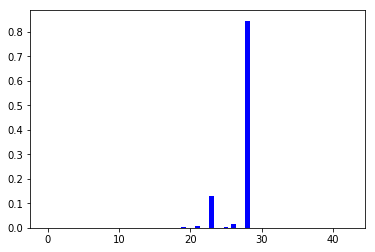

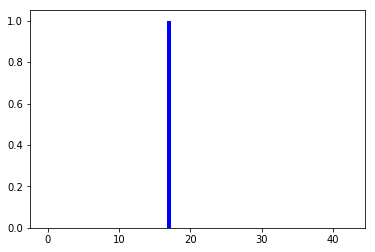

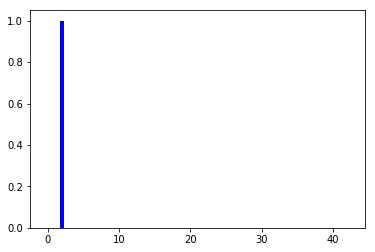

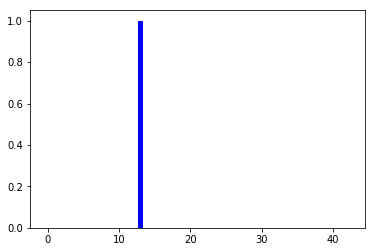

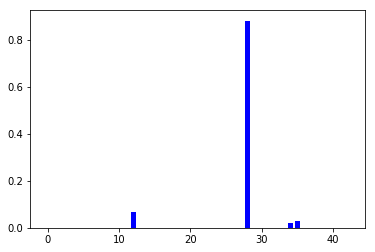

TopKV2(values=array([[  7.56916821e-01,   9.82469618e-02,   4.58609723e-02,
          2.53170878e-02,   2.20007766e-02],
       [  1.00000000e+00,   3.24869176e-09,   7.42193901e-15,
          2.93578893e-16,   1.99638307e-16],
       [  9.98659492e-01,   1.16217043e-03,   1.76475762e-04,
          1.35262860e-06,   5.56514863e-07],
       [  9.99951124e-01,   4.88404512e-05,   2.14295266e-08,
          6.20537888e-09,   8.42000913e-10],
       [  9.51302707e-01,   2.81104650e-02,   6.33867923e-03,
          3.88494157e-03,   2.92287674e-03]], dtype=float32), indices=array([[25, 10, 37, 19, 26],
       [17,  9, 14, 10, 38],
       [ 2,  3, 15,  5, 13],
       [13,  2, 25, 14, 39],
       [35, 33, 15, 37, 42]], dtype=int32))


In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)
top_5_softmax = tf.nn.top_k(softmax, k = 5)
with tf.Session() as sess: 
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmaxes = sess.run(softmax, feed_dict={x: X_test_signs})

    for i in range(5):
        classes = range(N)
        width = 1/1.5
        plt.bar(classes, softmaxes[i], width, color="blue")
        plt.show()
    
    result = sess.run(top_5_softmax, feed_dict={x: X_test_signs})
    print(result)
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

            
cv1_w = tf.Variable(tf.truncated_normal((5, 5, 4, 8), mean = mu, stddev = sigma))
cv1_b = tf.Variable(tf.zeros(8))
cv1 = tf.nn.conv2d(x, cv1_w, strides=[1, 1, 1, 1], padding = "VALID") + cv1_b

with tf.Session() as sess: 
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    mu = 0
    sigma = 0.1

    cv1s = sess.run(cv1, feed_dict={x: X_test_signs})
#     sess.run(outputFeatureMap(X_test_signs[0], cv1))
    
    print(X_test_signs[0].shape)
    

       

INFO:tensorflow:Restoring parameters from ./lenet


FailedPreconditionError: Attempting to use uninitialized value Variable_16
	 [[Node: Variable_16/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_16"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_16)]]
	 [[Node: add_8/_55 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_13_add_8", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Variable_16/read', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-6cc6aa1ffe50>", line 31, in <module>
    cv1_w = tf.Variable(tf.truncated_normal((5, 5, 4, 8), mean = mu, stddev = sigma))
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 199, in __init__
    expected_shape=expected_shape)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 330, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1400, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_16
	 [[Node: Variable_16/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_16"], _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_16)]]
	 [[Node: add_8/_55 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_13_add_8", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
